- AlexNet : 1세대. 이미지 데이터의 수학적인 부분을 정의
  - 11x11, 5x5 같은 큰 커널 사이즈로 하다 보니 너무 빨리 작아짐 

- VGG : 1.5세대
  - 커널 사이즈를 줄이면서 층을 깊게...
    - AlexNet이 그렇다면 3x3으로 계속 쌓으면 된다.
    - 한계 : 파라미터가 커지면서 층을 쌓아봤자 별 효과가 없음

- Xecption, GoogleNet : 2세대
  - Parameter는 최대한 작게 하면서 층을 깊게

- ResNet : 3세대
  - 잔차학습의 시작

# VGG - 16(2014)의 구조
- 16 : Layer의 개수
  - 아래의 사진에서는 Pooling 빼고 16개
  - Fully Connected Layer 포함

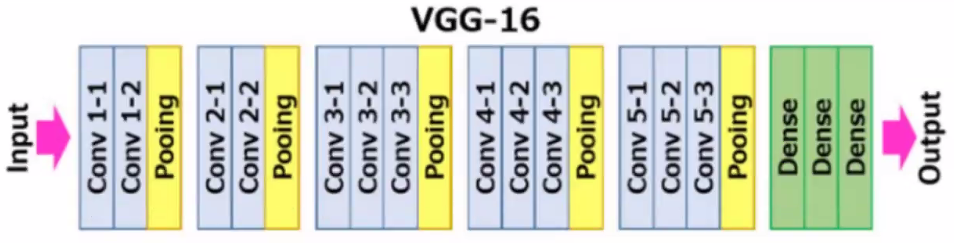

- 네트워크 깊이가 모델 성능에 영향을 준다.
- 커널 크기를 `3x3`으로 고정

# AlexNet v. VGG

- AlexNet의 고민
  - AlexNet은 Conlolution Layer를 쌓다보니 '깊으면 성능이 좋아진다.'를 발견
  - 이미지 별로 Conv 연산을 위한 커널의 크기와 개수, padding, strides 값을 어떻게 정해야 할지 고민

- VGG의 장점
  - 단일화된 커널 크기, padding, strides 값으로 단순한 네트워크 구성
    - AlexNet보다 더 나은 성능
  - AlexNet의 11x11, 5x5 같은 큰 Receptive Field를 가진 커널 크기를 적용하지 않고 3x3 커널을 연속 적용
  - AlexNet보다 깊은 네트워크를 구성하나, 더 적은 파라미터 개수로 연산 성능 개선

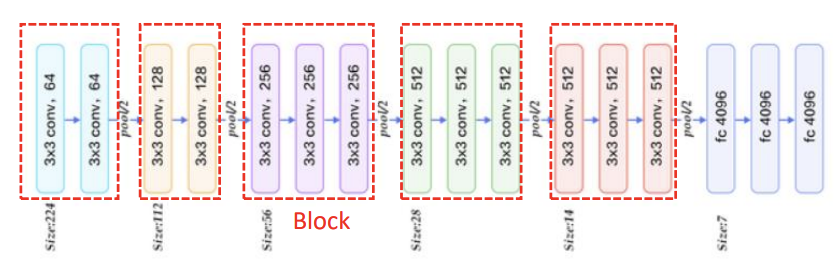

[CNN_05. CNN with ImageDataGenerator](https://colab.research.google.com/drive/1KgAtIO-M1Vk0yiXqbg0jQoEvIwR9jW5r?usp=sharing)의 `모델링 수행`에서 만들어봤다.

# VGG-16 상세 구조
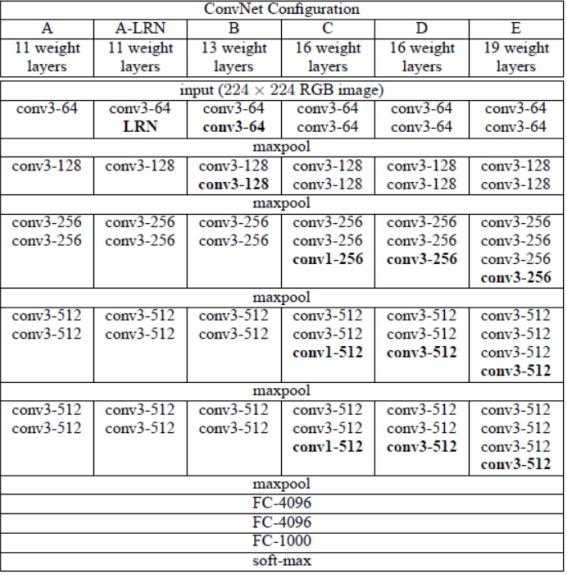


- conv3-64 : kernel_size = 3인 커널이 64개

- maxpool : 지날 때 크기가 1/2 됨

- `C`의 경우 두 번째 maxpool부터 Conv `1x1`이 있음
  - Bottle Neck
  - `필터가 1개다 = 무의미` 가 *$\;{\color{red}{아님}}$*

- `D`의 경우 3x3

In [ ]:
# Feature Extraction Layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# FCL
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D

In [ ]:
input = Input(shape=(224, 224, 3))

# Block 1 : (3, 3, 64)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)

# Reduce Output Feature Map Size : (112, 112, 64)
x = MaxPooling2D(pool_size=2, strides=2)(x)

# Block 2 : (3, 3, 128)
x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)

# Reduce
x = MaxPooling2D(pool_size=2, strides=2)(x)

# Block 3 : (3, 3, 256)
x = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(x)

# Reduce
x = MaxPooling2D(pool_size=2, strides=3)(x)

# Block 4 : (3, 3, 512)
x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)

# Reduce
x = MaxPooling2D(pool_size=2, strides=3)(x)

# Block 5 : (3, 3, 512)
x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)

# Reduce
x = MaxPooling2D(pool_size=2, strides=3)(x)

# Fully Connected Layer
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(10, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                             